<a href="https://colab.research.google.com/github/girijeshcse/experiments/blob/main/world_leaders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 8.3MB/s 
     |████████████████████████████████| 51kB 8.4MB/s 
     |████████████████████████████████| 1.2MB 47.4MB/s 
     |████████████████████████████████| 194kB 53.2MB/s 
     |████████████████████████████████| 61kB 10.1MB/s 
     |████████████████████████████████| 61kB 9.2MB/s 
Mounted at /content/gdrive


In [2]:
#hide
from fastbook import *
from fastai.vision.widgets import *

In [3]:
import os
#search_images_ddg is the utility to download images from the internet
#It basically return a list containing url of the images.
def search_images_ddg(term, max_images=200):
    "Search for `term` with DuckDuckGo and return a unique urls of about `max_images` images"
    assert max_images<1000
    url = 'https://duckduckgo.com/'
    res = urlread(url,data={'q':term}, decode=False).decode()
    searchObj = re.search(r'vqd=([\d-]+)\&', res)
    assert searchObj
    requestUrl = url + 'i.js'
    params = dict(l='us-en', o='json', q=term, vqd=searchObj.group(1), f=',,,', p='1', v7exp='a')
    urls,data = set(),{'next':1}
    while len(urls)<max_images and 'next' in data:
        try:
            data = urljson(requestUrl,data=params)
            urls.update(L(data['results']).itemgot('image'))
            requestUrl = url + data['next']
        except (URLError,HTTPError): pass
        time.sleep(0.2)
    return L(urls)

In [4]:
results = search_images_ddg( 'Benjamin Netanyahu', max_images=100)

type(results)

fastcore.foundation.L

In [5]:
#We can verify it via printing the list results

print(results)
len(results)

['https://www.thenational.ae/image/policy:1.834159:1551949267/FILE-PHOTO-Israeli-Prime-Minister-Benjamin-Netanyahu-delivers-a-speech-at-the-launch-of-Likud-party-election-campaign-in-Ramat-Gan.JPG?f=16x9&w=1200&$p$f$w=36dd067', 'https://static.independent.co.uk/s3fs-public/thumbnails/image/2017/01/02/17/benjamin-netanyahu.jpg?width=982&height=726', 'http://1.bp.blogspot.com/-CppVWmRi-kE/TdsZYVVmKXI/AAAAAAAAK7o/Y09Sl8vd9G0/s400/Benjamin_Netanyahu_29.jpg', 'https://www.inquirer.com/resizer/WUcUeX6pZ3HRiblGgnXMPezaNLs=/1400x932/smart/arc-anglerfish-arc2-prod-pmn.s3.amazonaws.com/public/M6GOJ33SDND37NMMMQ2LRNXJ5Q.jpg', 'http://media.breitbart.com/media/2015/05/ap_benjamin-netanyahu_ap-photo3.jpg', 'https://upload.wikimedia.org/wikipedia/commons/thumb/b/ba/Benjamin_Netanyahu_2016.jpg/640px-Benjamin_Netanyahu_2016.jpg', 'https://static.timesofisrael.com/www/uploads/2018/09/F180916FFMS02-e1537095082301.jpg', 'http://media4.s-nbcnews.com/i/newscms/2014_32/599236/140804-netanyahu-6a_331f7057e92

100

In [7]:
#hide
ims = ['https://www.inquirer.com/resizer/WUcUeX6pZ3HRiblGgnXMPezaNLs=/1400x932/smart/arc-anglerfish-arc2-prod-pmn.s3.amazonaws.com/public/M6GOJ33SDND37NMMMQ2LRNXJ5Q.jpg']

In [8]:
!mkdir images

In [9]:
# Created a images directory to put the downloaded pic
dest = 'images/sachin.jpg'
download_url(ims[0], dest) # downloading the image to the given path

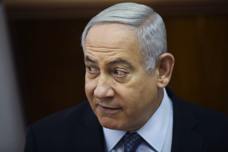

In [10]:
# PIL Image funtion is useful to visualise the downloaded pic
im = Image.open(dest)
im.to_thumb(228,228)

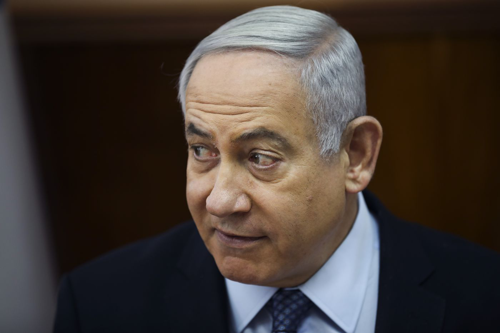

In [11]:
im.to_thumb( 500) # We can change number of pixel to visualize

In [53]:
# Lets create 3 diffrent directory for classes we are going to create in dataset
leader_types = 'Benjamin Netanyahu', 'Narendra Modi', 'Angela Merkel', 'Vladimir Putin', 'Xi Jinping', 'Joe Biden'
path = Path('leader')

In [54]:
!ls

gdrive	images	leader	sample_data


In [68]:
!rm -rf leader

In [69]:
from tqdm import tqdm
if not path.exists():
    path.mkdir()
    for o in tqdm(leader_types):
        dest = (path/o)
        print(dest)
        dest.mkdir(exist_ok=True)
        results = search_images_ddg( f'{o} leader', max_images=200)
        download_images(dest, urls=results)


  0%|          | 0/6 [00:00<?, ?it/s]

leader/Benjamin Netanyahu



 17%|█▋        | 1/6 [00:20<01:43, 20.62s/it]

leader/Narendra Modi



 33%|███▎      | 2/6 [00:45<01:27, 21.86s/it]

leader/Angela Merkel



 50%|█████     | 3/6 [01:05<01:04, 21.40s/it]

leader/Vladimir Putin



 67%|██████▋   | 4/6 [01:25<00:41, 20.97s/it]

leader/Xi Jinping



 83%|████████▎ | 5/6 [01:47<00:21, 21.21s/it]

leader/Joe Biden



100%|██████████| 6/6 [02:03<00:00, 20.58s/it]


In [70]:
!ls

gdrive	images	leader	sample_data


In [71]:
!ls leader/

'Angela Merkel'       'Joe Biden'      'Vladimir Putin'
'Benjamin Netanyahu'  'Narendra Modi'  'Xi Jinping'


In [72]:
fns = get_image_files(path)
fns

(#1238) [Path('leader/Narendra Modi/00000210.jpg'),Path('leader/Narendra Modi/00000218.jpg'),Path('leader/Narendra Modi/00000238.jpg'),Path('leader/Narendra Modi/00000033.jpeg'),Path('leader/Narendra Modi/00000233.jpg'),Path('leader/Narendra Modi/00000242.jpg'),Path('leader/Narendra Modi/00000104.jpg'),Path('leader/Narendra Modi/00000188.jpg'),Path('leader/Narendra Modi/00000085.jpg'),Path('leader/Narendra Modi/00000156.png')...]

In [73]:
#There might be some corrupt images which we can verify 
failed = verify_images(fns)
failed

(#11) [Path('leader/Joe Biden/00000171.jpg'),Path('leader/Benjamin Netanyahu/00000249.jpg'),Path('leader/Benjamin Netanyahu/00000004.jpg'),Path('leader/Benjamin Netanyahu/00000114.jpg'),Path('leader/Xi Jinping/00000238.jpg'),Path('leader/Xi Jinping/00000013.jpg'),Path('leader/Vladimir Putin/00000210.jpg'),Path('leader/Vladimir Putin/00000215.jpg'),Path('leader/Vladimir Putin/00000002.jpg'),Path('leader/Vladimir Putin/00000021.jpg')...]

In [74]:
# After verifying we can unlink those images from the dataset we prepared
failed.map(Path.unlink);

In [75]:
leaders = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [76]:

dls = leaders.dataloaders(path)

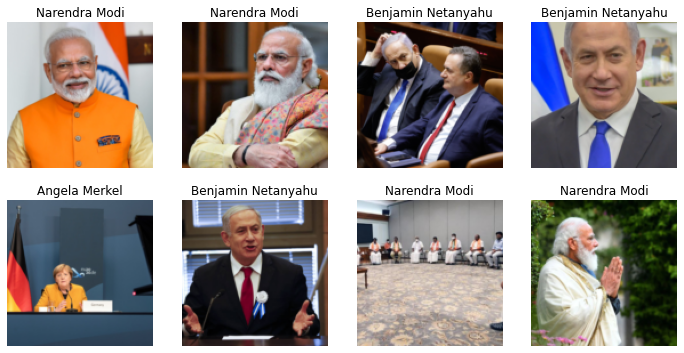

In [77]:
dls.valid.show_batch(max_n=8, nrows=2)

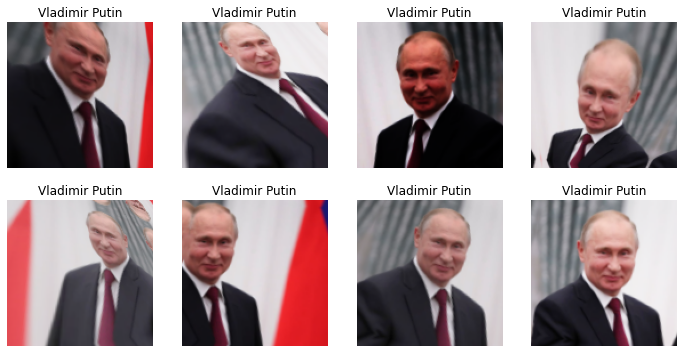

In [78]:
# Data augmentation

leaders = leaders.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = leaders.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

**Training Your Model, and Using It to Clean Your Data**

In [79]:
leaders = leaders.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = leaders.dataloaders(path)

In [80]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(20)

epoch,train_loss,valid_loss,error_rate,time
0,2.131663,0.917560,0.314286,00:26


epoch,train_loss,valid_loss,error_rate,time
0,0.904038,0.625167,0.191837,00:27
1,0.742662,0.518687,0.159184,00:26
2,0.634064,0.451013,0.118367,00:27
3,0.525616,0.420489,0.110204,00:26
4,0.421198,0.434583,0.093878,00:27
5,0.350326,0.406830,0.102041,00:26
6,0.279193,0.397193,0.093878,00:27
7,0.240427,0.414939,0.106122,00:26
8,0.206432,0.390660,0.093878,00:26
9,0.178963,0.427287,0.114286,00:26


In [88]:
learn = cnn_learner(dls, resnet18, metrics=error_rate, lr=0.0001 )
learn.fine_tune(30)

epoch,train_loss,valid_loss,error_rate,time
0,2.187654,0.817372,0.277551,00:27


epoch,train_loss,valid_loss,error_rate,time
0,0.923405,0.660728,0.212245,00:27
1,0.808456,0.535519,0.159184,00:27
2,0.691927,0.471574,0.126531,00:27
3,0.590566,0.414201,0.118367,00:27
4,0.497912,0.375262,0.110204,00:27
5,0.409971,0.348989,0.102041,00:26
6,0.334313,0.344485,0.093878,00:27
7,0.280917,0.338987,0.089796,00:26
8,0.241136,0.373808,0.102041,00:27
9,0.208155,0.463540,0.118367,00:27


In [82]:
learn = cnn_learner(dls, resnet18, metrics=error_rate, lr=0.01)
learn.fine_tune(20)

epoch,train_loss,valid_loss,error_rate,time
0,2.246662,0.848329,0.273469,00:27


epoch,train_loss,valid_loss,error_rate,time
0,0.960543,0.622985,0.179592,00:27
1,0.779304,0.526358,0.134694,00:27
2,0.651733,0.468214,0.142857,00:26
3,0.528134,0.394124,0.122449,00:26
4,0.430197,0.385772,0.130612,00:27
5,0.351990,0.351360,0.093878,00:27
6,0.295296,0.384280,0.106122,00:27
7,0.260409,0.303457,0.089796,00:27
8,0.213288,0.304603,0.085714,00:27
9,0.184865,0.351135,0.093878,00:26


In [83]:
learn34 = cnn_learner(dls, resnet34, metrics=error_rate)
learn34.fine_tune(20)

epoch,train_loss,valid_loss,error_rate,time
0,2.280573,0.826245,0.269388,00:27


epoch,train_loss,valid_loss,error_rate,time
0,0.924329,0.502255,0.163265,00:27
1,0.740206,0.390479,0.126531,00:28
2,0.582401,0.370460,0.110204,00:27
3,0.461667,0.304481,0.089796,00:27
4,0.380376,0.360132,0.106122,00:27
5,0.312055,0.352873,0.093878,00:28
6,0.255122,0.284933,0.081633,00:28
7,0.214121,0.320854,0.085714,00:28
8,0.176837,0.299891,0.081633,00:28
9,0.141586,0.300576,0.085714,00:28


In [84]:
learn34 = cnn_learner(dls, resnet34, metrics=error_rate, lr=0.0001)
learn34.fine_tune(20)

epoch,train_loss,valid_loss,error_rate,time
0,2.212506,0.854061,0.281633,00:28


epoch,train_loss,valid_loss,error_rate,time
0,0.928869,0.544446,0.175510,00:27
1,0.754661,0.435303,0.118367,00:28
2,0.600646,0.350915,0.097959,00:27
3,0.472610,0.274480,0.073469,00:28
4,0.379003,0.259115,0.073469,00:27
5,0.306335,0.267156,0.077551,00:28
6,0.239701,0.294769,0.085714,00:28
7,0.195620,0.285972,0.085714,00:28
8,0.163409,0.408664,0.106122,00:28
9,0.143828,0.264614,0.065306,00:28


In [85]:
learn50 = cnn_learner(dls, resnet50, metrics=error_rate)
learn50.fine_tune(100)

epoch,train_loss,valid_loss,error_rate,time
0,1.625572,0.820105,0.204082,00:27


epoch,train_loss,valid_loss,error_rate,time
0,0.584992,0.467780,0.130612,00:28
1,0.444113,0.406466,0.106122,00:29
2,0.356203,0.363695,0.114286,00:28
3,0.285678,0.317543,0.106122,00:29
4,0.246925,0.277604,0.093878,00:28
5,0.212678,0.263293,0.085714,00:29
6,0.181131,0.240188,0.073469,00:28
7,0.145944,0.210669,0.069388,00:28
8,0.119130,0.216822,0.069388,00:28
9,0.102067,0.270021,0.081633,00:28


KeyboardInterrupt: ignored

In [86]:
learn50 = cnn_learner(dls, resnet50, metrics=error_rate, lr=0.0001)
learn50.fine_tune(20)

epoch,train_loss,valid_loss,error_rate,time
0,1.627846,0.697619,0.175510,00:27


epoch,train_loss,valid_loss,error_rate,time
0,0.638803,0.431087,0.118367,00:27
1,0.458737,0.327167,0.106122,00:28
2,0.358836,0.267329,0.073469,00:28
3,0.280583,0.346728,0.102041,00:28
4,0.237339,0.320207,0.093878,00:28
5,0.212215,0.399134,0.126531,00:28
6,0.185732,0.327562,0.089796,00:28
7,0.169048,0.277286,0.069388,00:29
8,0.137675,0.322892,0.085714,00:28
9,0.117882,0.244248,0.057143,00:29


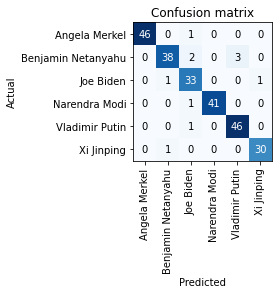

In [89]:
interp = ClassificationInterpretation.from_learner(learn50)
interp.plot_confusion_matrix()

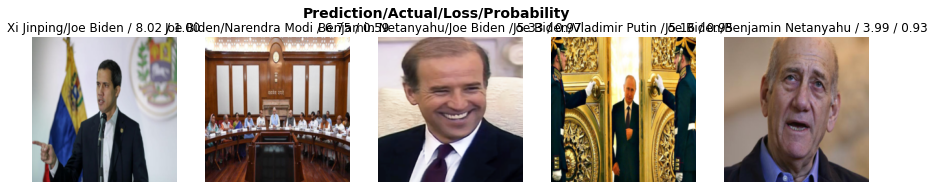

In [90]:
interp.plot_top_losses(5, nrows=1)

**Turning Your Model into an Online Application**

Using the Model for Inference

In [91]:
learn50.export()

In [92]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [93]:
learn_inf = load_learner(path/'export.pkl')

In [94]:
!pip freeze > requirement.txt

In [95]:
!cat requirement.txt

absl-py==0.12.0
alabaster==0.7.12
albumentations==0.1.12
altair==4.1.0
appdirs==1.4.4
argon2-cffi==20.1.0
arviz==0.11.2
astor==0.8.1
astropy==4.2.1
astunparse==1.6.3
async-generator==1.10
atari-py==0.2.9
atomicwrites==1.4.0
attrs==21.2.0
audioread==2.1.9
autograd==1.3
Babel==2.9.1
backcall==0.2.0
beautifulsoup4==4.6.3
bleach==3.3.0
blis==0.4.1
bokeh==2.3.2
Bottleneck==1.3.2
branca==0.4.2
bs4==0.0.1
CacheControl==0.12.6
cached-property==1.5.2
cachetools==4.2.2
catalogue==1.0.0
certifi==2021.5.30
cffi==1.14.5
cftime==1.5.0
chardet==3.0.4
click==7.1.2
cloudpickle==1.3.0
cmake==3.12.0
cmdstanpy==0.9.5
colorcet==2.0.6
colorlover==0.3.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.3.2
coverage==3.7.1
coveralls==0.5
crcmod==1.7
cufflinks==0.17.3
cupy-cuda101==9.1.0
cvxopt==1.2.6
cvxpy==1.0.31
cycler==0.10.0
cymem==2.0.5
Cython==0.29.23
daft==0.0.4
dask==2.12.0
datascience==0.10.6
debugpy==1.0.0
decorator==4.4.2
defusedxml==0.7.1
descartes==1.1.0
dill==0.3.4
distributed==1.25.3
dlib==1